In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [7]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    
    # For displaying purposes, pick columns that have between 1 and 50 unique values
    df = df[[col for col in df if 1 < nunique[col] < 50]]
    
    nRow, nCol = df.shape
    columnNames = list(df)
    
    # Use integer division
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    
    # Create a figure
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    # Adjust layout
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    
    # Show the plot
    plt.show()


In [10]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    
    # Drop columns with NaN
    df = df.dropna(axis='columns')
    
    # Keep columns where there are more than 1 unique values
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    
    # Calculate the correlation matrix
    corr = df.corr()
    
    # Create a figure
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    
    # Display the correlation matrix as an image
    corrMat = plt.matshow(corr, fignum=1)
    
    # Set labels and ticks
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    # Move x-axis ticks to the bottom
    plt.gca().xaxis.tick_bottom()
    
    # Add colorbar
    plt.colorbar(corrMat)
    
    # Set title
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    
    # Show the plot
    plt.show()

In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/Reviews.csv

In [4]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Reviews.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('Reviews.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Reviews.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 10 columns


Let's take a quick look at what the data looks like:

In [5]:
df1.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Distribution graphs (histogram/bar graph) of sampled columns:

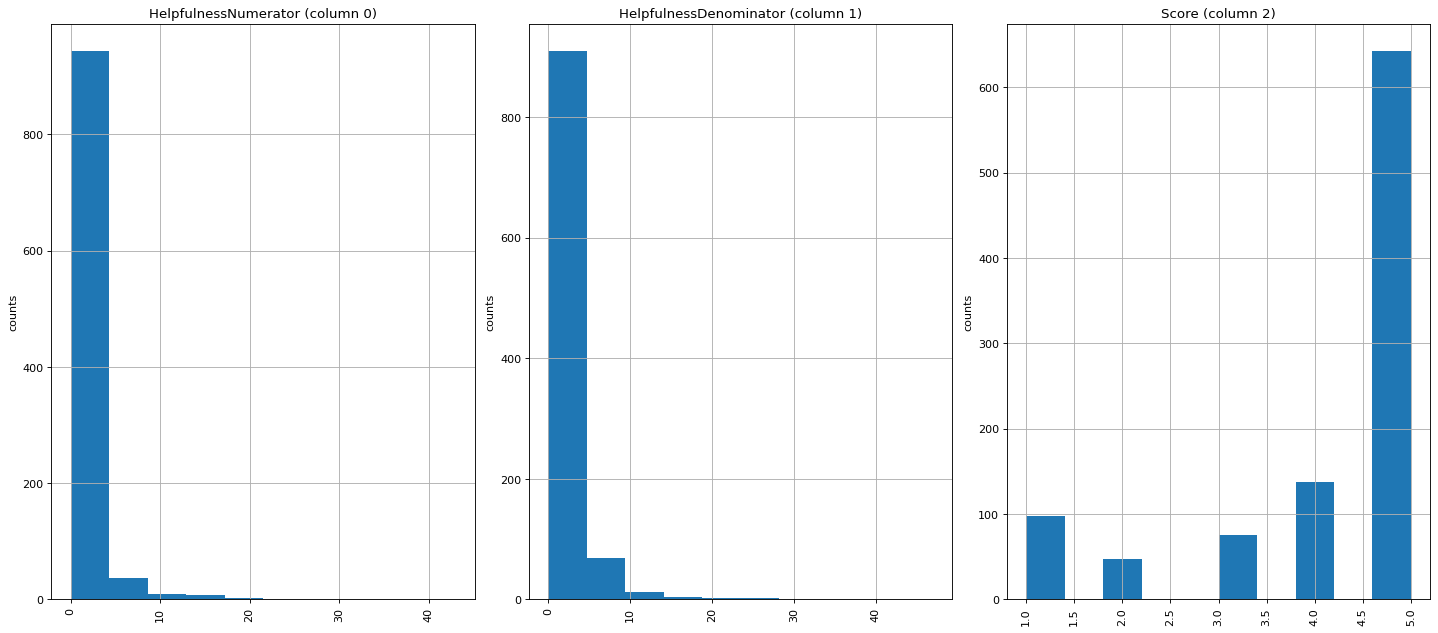

In [8]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

In [11]:
plotCorrelationMatrix(df1, 8)

ValueError: could not convert string to float: 'B001E4KFG0'

Scatter and density plots:

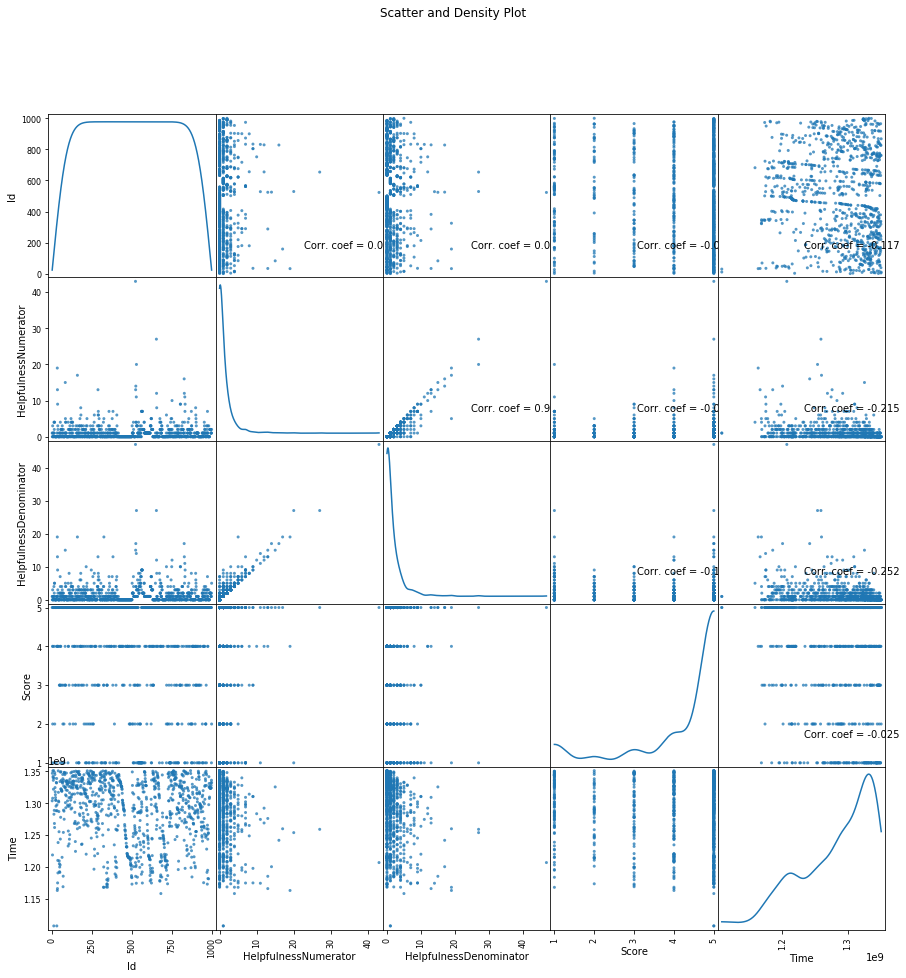

In [10]:
plotScatterMatrix(df1, 15, 10)